In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


In [3]:
# Load the dataset 
glass_df = pd.read_csv('glass.csv')


In [5]:
# Display basic information about the dataset
display(glass_df.info())
display(glass_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


None

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [7]:
# Check for null values
display(glass_df.isnull().sum())


RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [9]:
# Summary statistics of numerical columns
display(glass_df.describe())


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
# Class distribution of the target variable 'Type'
display(glass_df['Type'].value_counts())


2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: Type, dtype: int64

In [13]:
# Class distribution of the target variable 'Type'
display(glass_df['Type'].value_counts())


2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: Type, dtype: int64

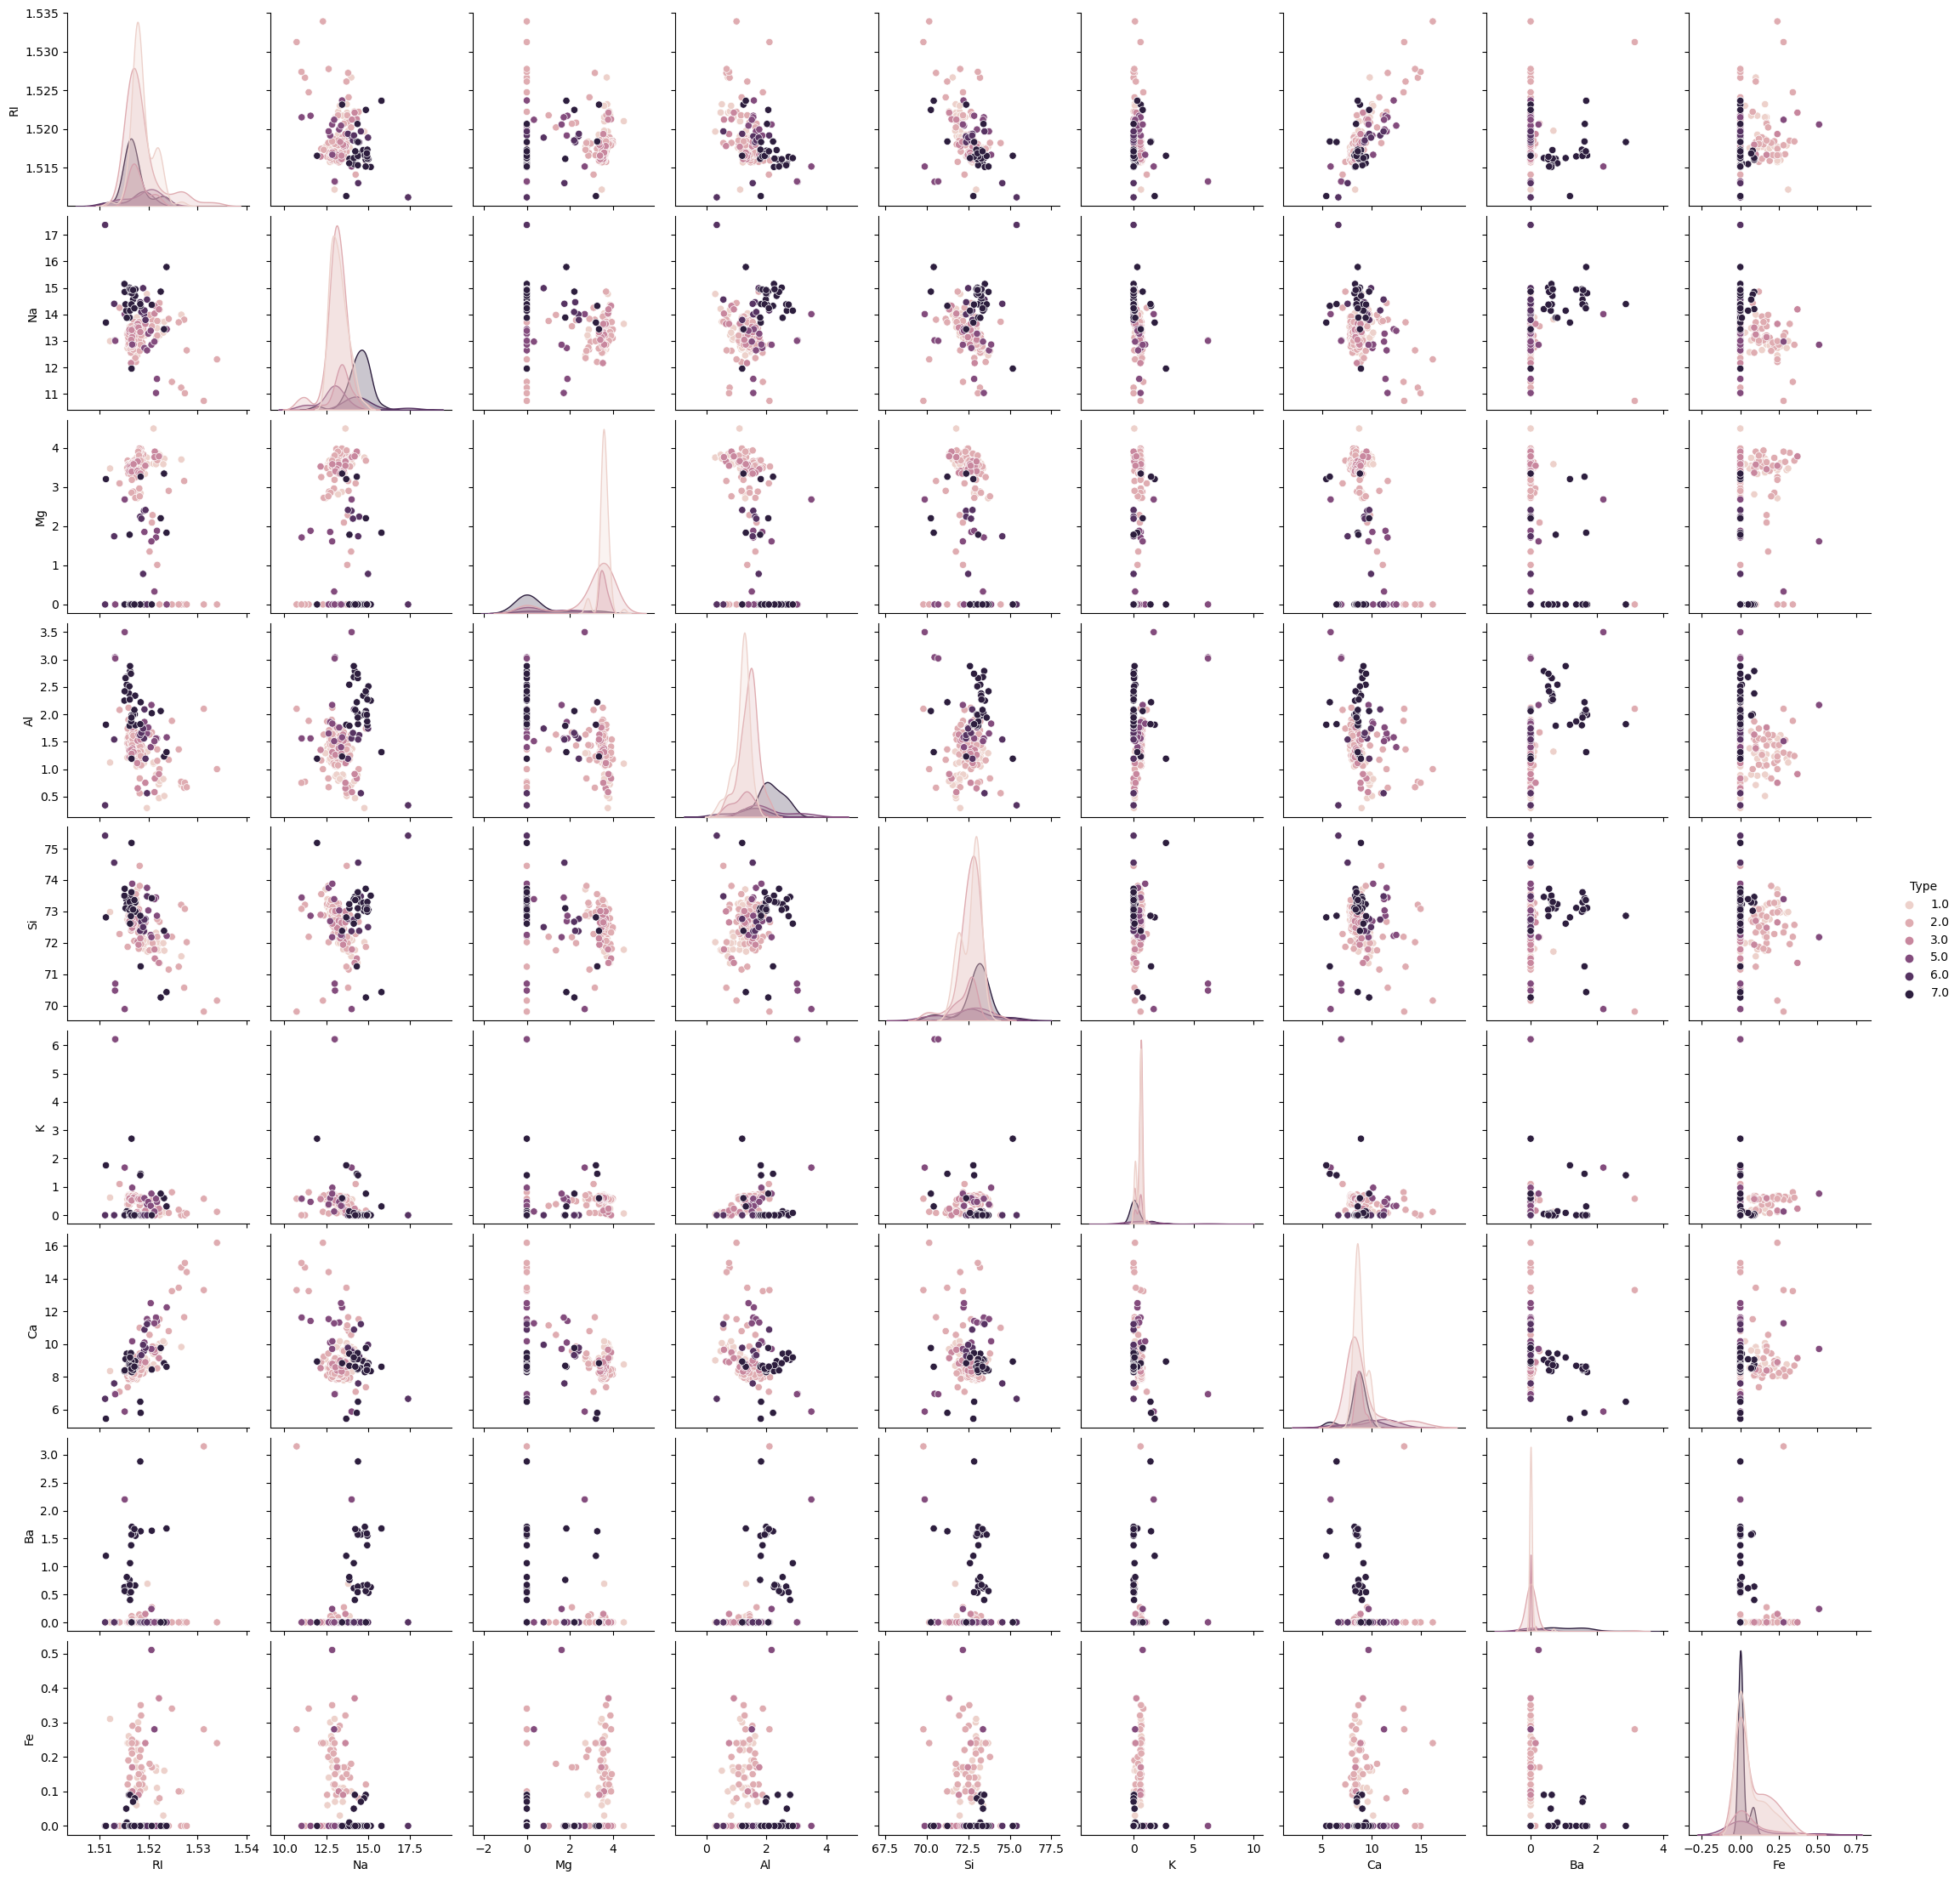

In [17]:
# Pairplot to visualize pairwise relationships among features
sns.pairplot(glass_df, hue='Type')
plt.show()


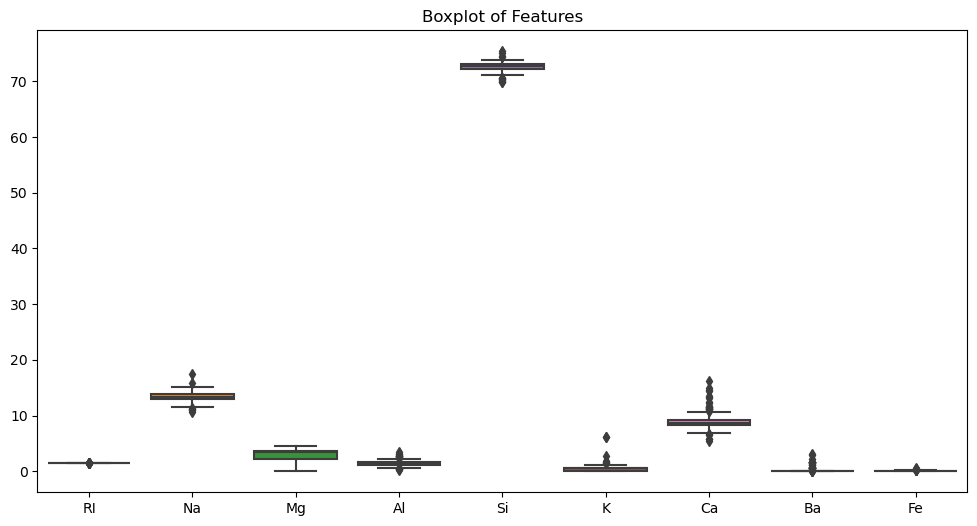

In [18]:
# Boxplot to visualize the distribution and outliers of features
plt.figure(figsize=(12, 6))
sns.boxplot(data=glass_df.drop(columns='Type'))
plt.title("Boxplot of Features")
plt.show()


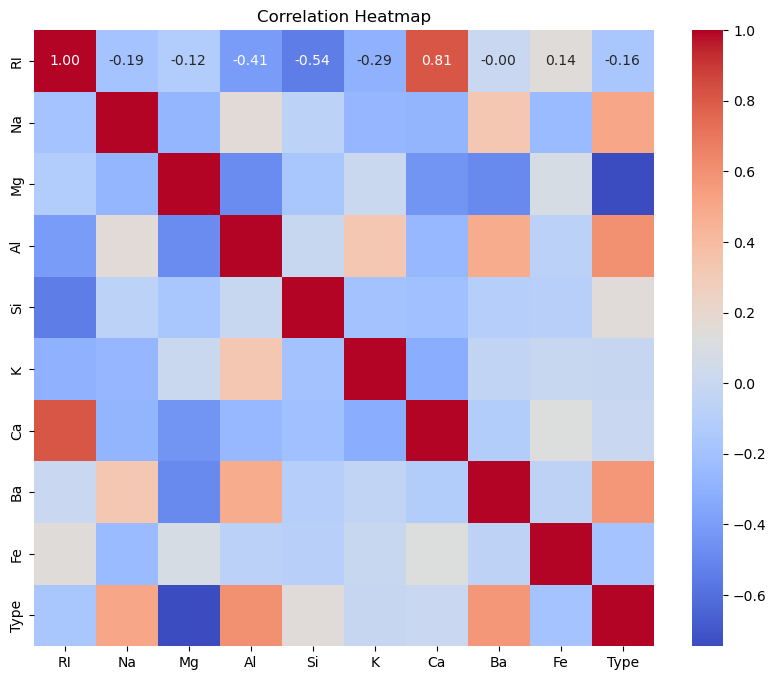

In [19]:
# Heatmap to visualize correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(glass_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Separate features and target variable
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']


In [21]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
# Handle class imbalance by upsampling minority classes
max_size = y.value_counts().max()
X_resampled = []
y_resampled = []

# Convert X_scaled to a DataFrame for easier indexing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Loop through each class
for class_label in y.unique():
    X_class = X_scaled_df[y == class_label]
    y_class = y[y == class_label]
    
    # If the class is not empty, proceed
    if len(X_class) > 0:
        if len(X_class) < max_size:
            X_upsampled, y_upsampled = resample(
                X_class, y_class, replace=True, n_samples=max_size, random_state=42
            )
        else:
            X_upsampled = X_class
            y_upsampled = y_class
        
        X_resampled.append(X_upsampled)
        y_resampled.append(y_upsampled)

# Combine resampled data
X_balanced = pd.concat(X_resampled, axis=0).values
y_balanced = pd.concat(y_resampled, axis=0).values


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [39]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:
# Bagging (using Random Forest as base estimator)
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(f"Bagging Accuracy: {bagging_accuracy:.2f}")


Bagging Accuracy: 0.95


In [57]:
# Boosting (using AdaBoost)
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

boosting_pred = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
print(f"Boosting (AdaBoost) Accuracy: {boosting_accuracy:.2f}")


Boosting (AdaBoost) Accuracy: 0.52


In [59]:
# Bagging Explanation
print("""
Bagging (Bootstrap Aggregating):
- Bagging is a technique that trains multiple models on different random subsets of the data.
- Each model is trained independently, and their predictions are combined (e.g., average or majority vote).
- This reduces the variance of the model and prevents overfitting.
- Example: Random Forest is a well-known Bagging algorithm.
""")



Bagging (Bootstrap Aggregating):
- Bagging is a technique that trains multiple models on different random subsets of the data.
- Each model is trained independently, and their predictions are combined (e.g., average or majority vote).
- This reduces the variance of the model and prevents overfitting.
- Example: Random Forest is a well-known Bagging algorithm.



In [61]:
# Boosting Explanation
print("""
Boosting:
- Boosting is an ensemble method that trains models sequentially.
- Each new model corrects the errors made by the previous models.
- Boosting focuses on difficult examples to improve prediction accuracy.
- Examples: AdaBoost, Gradient Boosting.
""")



Boosting:
- Boosting is an ensemble method that trains models sequentially.
- Each new model corrects the errors made by the previous models.
- Boosting focuses on difficult examples to improve prediction accuracy.
- Examples: AdaBoost, Gradient Boosting.



In [63]:
# Difference between Bagging and Boosting
print("""
Difference between Bagging and Boosting:
1. Bagging trains models independently on random subsets of data, while Boosting trains models sequentially.
2. Bagging reduces variance, while Boosting reduces bias.
3. Bagging is good for high variance models, while Boosting is good for high bias models.
""")



Difference between Bagging and Boosting:
1. Bagging trains models independently on random subsets of data, while Boosting trains models sequentially.
2. Bagging reduces variance, while Boosting reduces bias.
3. Bagging is good for high variance models, while Boosting is good for high bias models.



In [65]:
# Handling Imbalance in Data
print("""
Handling Imbalance in Data:
- Imbalance means some classes have many samples, while others have very few.
- This can cause the model to favor the majority class.
Methods to handle imbalance:
1. Upsampling: Duplicate samples from the minority class.
2. Downsampling: Remove samples from the majority class.
3. SMOTE: Create synthetic samples for the minority class.
4. Class Weights: Assign higher importance to the minority class during training.
""")



Handling Imbalance in Data:
- Imbalance means some classes have many samples, while others have very few.
- This can cause the model to favor the majority class.
Methods to handle imbalance:
1. Upsampling: Duplicate samples from the minority class.
2. Downsampling: Remove samples from the majority class.
3. SMOTE: Create synthetic samples for the minority class.
4. Class Weights: Assign higher importance to the minority class during training.

